In [2]:
## 2 Step: Mid-Day Examination.

%pip install geopandas

# Import necessary library
import geopandas as gpd

# Path to your GeoJSON file
file_path = "C:/Users/25077/Final/data/2020_PA_stops_buffer3_UTCI.geojson"

# Read the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(file_path)

import matplotlib.pyplot as plt

# Convert MULTIPOLYGON geometries to their centroids
gdf['geometry'] = gdf.geometry.centroid

# Reproject to WGS 84 (EPSG:4326)
gdf = gdf.to_crs(epsg=4326)

# Load the city limits GeoJSON
city_limits_gdf = gpd.read_file("C:/Users/25077/Final/data/City_Limits.geojson")
city_limits_gdf = city_limits_gdf.to_crs(epsg=4326)  # Reproject if needed

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import pandas as pd

# Function to filter necessary columns
def filter_13_mean(data):
   
    # Select necessary columns
    filtered_data = data[["stop_id", "stop_name", "13_mean", "geometry"]]
    return filtered_data

# Applying the function to the existing gdf
filtered_gdf = filter_13_mean(gdf)

# Display or save the filtered data
print(filtered_gdf)


     stop_id                             stop_name    13_mean  \
0         69             Front St & Market St Loop  37.893180   
1        359                    Market St & 6th St  37.907860   
2        428                  2nd St Station - MFL  37.825040   
3        638               5th St & Market St - FS  37.704560   
4        735                    7th St & Market St  35.379926   
...      ...                                   ...        ...   
8121   32318            Hunting Park Av & Front St  37.861160   
8122   32322            Hunting Park Av & Front St  38.254392   
8123   32323          Hunting Park Av & Bristol St  37.981067   
8124   32368  Hunting Park Av & Macalester St - FS  37.839459   
8125   32369       Hunting Park Av & Macalester St  38.072696   

                        geometry  
0     POINT (-75.14232 39.94977)  
1     POINT (-75.15024 39.95081)  
2     POINT (-75.14376 39.94979)  
3     POINT (-75.14876 39.95105)  
4     POINT (-75.15195 39.95080)  
...      

c:\Users\25077\miniforge3\envs\musa-550-fall-2023\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


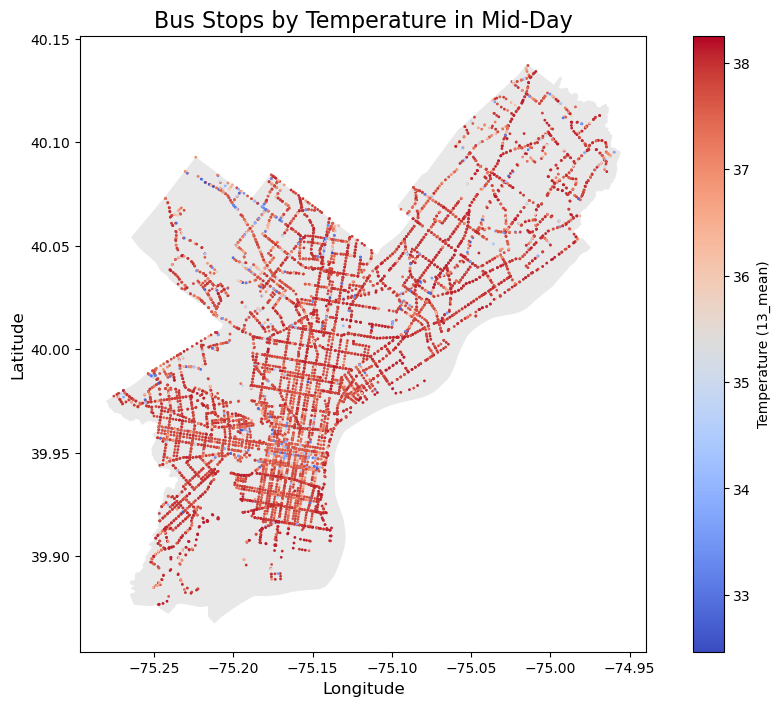

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your city limits data
city_limits_gdf = gpd.read_file("C:/Users/25077/Final/data/City_Limits.geojson")

# Ensure both GeoDataFrames use the same CRS
city_limits_gdf = city_limits_gdf.to_crs(epsg=4326)
filtered_gdf = filtered_gdf.to_crs(epsg=4326)

# Perform a spatial join to filter stops within the city limits
stops_within_city = gpd.sjoin(filtered_gdf, city_limits_gdf, op="within")

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot city limits
city_limits_gdf.plot(ax=ax, color="lightgrey", alpha=0.5, label="City Limits")

# Plot stops, color-coded by temperature (13_mean)
stops_within_city.plot(
    ax=ax,
    column="13_mean",
    cmap="coolwarm",
    legend=True,
    legend_kwds={"label": "Temperature (13_mean)"},
    markersize=1,
)

# Add titles and labels
plt.title("Bus Stops by Temperature in Mid-Day", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Display the plot
plt.show()


In [5]:
filtered_gdf.head()

,stop_id,stop_name,13_mean,geometry
0,69,Front St & Market St Loop,37.893180,POINT (-75.14232 39.94977)
1,359,Market St & 6th St,37.907860,POINT (-75.15024 39.95081)
2,428,2nd St Station - MFL,37.825040,POINT (-75.14376 39.94979)
3,638,5th St & Market St - FS,37.704560,POINT (-75.14876 39.95105)
4,735,7th St & Market St,35.379926,POINT (-75.15195 39.95080)


C:\Users\25077\AppData\Local\Temp\ipykernel_18848\4235607243.py:39: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


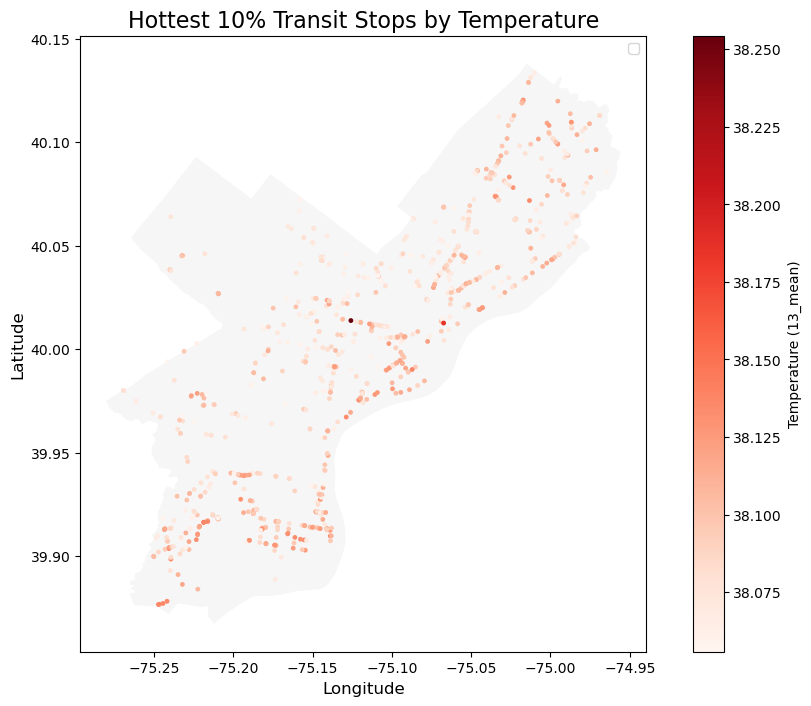

In [6]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


# Check for missing values and drop rows with NaN
filtered_gdf["x"] = filtered_gdf.geometry.x
filtered_gdf["y"] = filtered_gdf.geometry.y
filtered_gdf = filtered_gdf.dropna(subset=["x", "y", "13_mean"])

# Calculate the threshold for the hottest 10% stops
threshold = np.percentile(filtered_gdf["13_mean"], 90)

# Filter the hottest 10% stops
hottest_stops = filtered_gdf[filtered_gdf["13_mean"] >= threshold]

# Plot the hottest 10% stops
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot city limits
city_limits_gdf.plot(ax=ax, color="lightgrey", alpha=0.2, label="City Limits")

# Plot hottest stops
hottest_stops.plot(
    ax=ax,
    column="13_mean",
    cmap="Reds",
    legend=True,
    legend_kwds={"label": "Temperature (13_mean)"},
    markersize=6,
    alpha=1,
)

# Add titles and labels
plt.title("Hottest 10% Transit Stops by Temperature", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend()
plt.show()


C:\Users\25077\AppData\Local\Temp\ipykernel_18848\3189886705.py:28: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


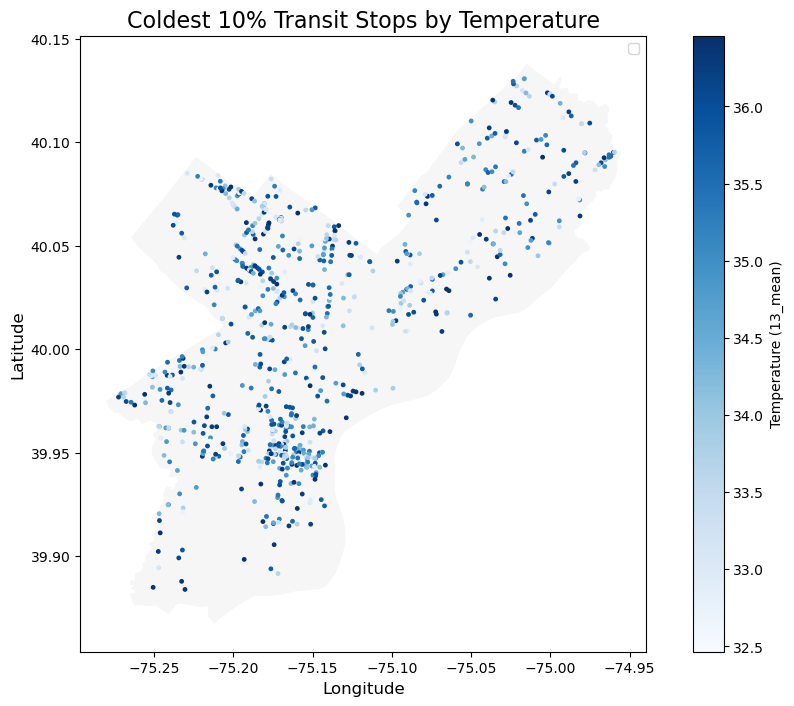

In [7]:
# Calculate the threshold for the coldest 10% stops
cold_threshold = np.percentile(filtered_gdf["13_mean"], 10)

# Filter the coldest 10% stops
coldest_stops = filtered_gdf[filtered_gdf["13_mean"] <= cold_threshold]

# Plot the coldest 10% stops
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot city limits
city_limits_gdf.plot(ax=ax, color="lightgrey", alpha=0.2, label="City Limits")

# Plot coldest stops
coldest_stops.plot(
    ax=ax,
    column="13_mean",
    cmap="Blues",
    legend=True,
    legend_kwds={"label": "Temperature (13_mean)"},
    markersize=6,
    alpha=1,
)

# Add titles and labels
plt.title("Coldest 10% Transit Stops by Temperature", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend()
plt.show()


c:\Users\25077\miniforge3\envs\musa-550-fall-2023\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Clusters found: [ 0 -1  2  1  4  3  5  6  7  8  9 10 12 11 13 14 15 16 17 18 19 20 21 22
 23 44 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Cluster sizes:
 -1     263
 25     70
 1      46
 17     43
 3      28
 12     25
 6      24
 31     19
 43     16
 18     14
 2      13
 5      13
 28     12
 7      11
 36     10
 24     10
 13     10
 16     10
 38      9
 10      9
 33      9
 42      9
 19      8
 20      8
 30      7
 0       7
 15      7
 14      7
 9       7
 34      6
 35      6
 40      6
 23      6
 41      5
 39      5
 8       5
 37      5
 44      5
 11      5
 32      5
 29      5
 21      5
 27      5
 26      5
 22      5
 4       3
Name: cluster, dtype: int64


C:\Users\25077\AppData\Local\Temp\ipykernel_18848\965146887.py:43: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


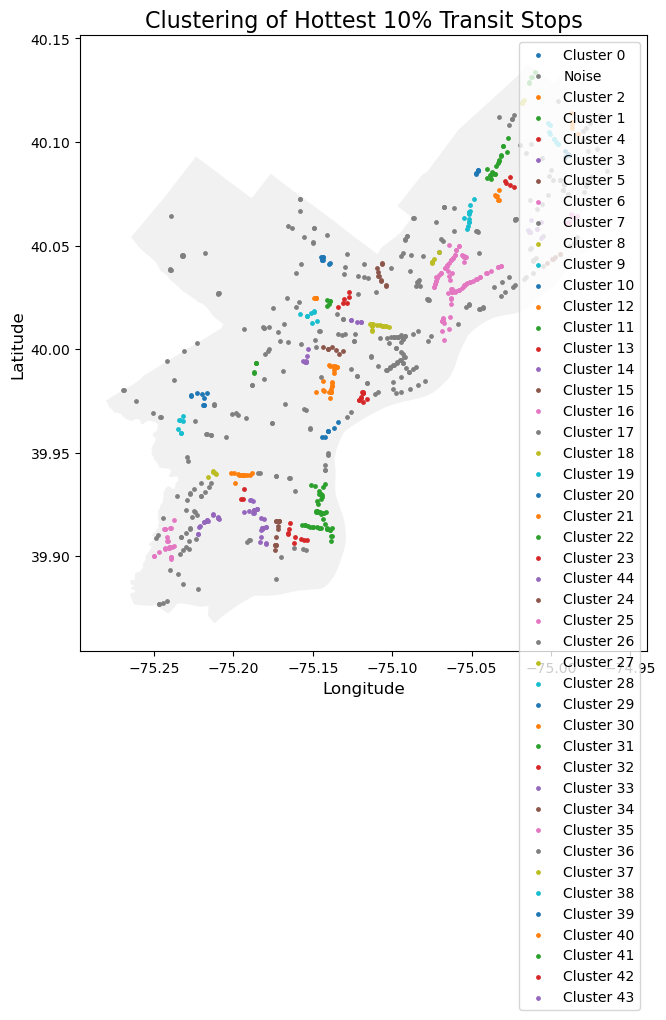

In [8]:
from sklearn.cluster import DBSCAN

# Extract coordinates for the hottest 10% stops
hottest_coordinates = hottest_stops[["x", "y"]].values

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.005, min_samples=5, metric="euclidean")
hottest_stops["cluster"] = dbscan.fit_predict(hottest_coordinates)

# Check if clustering occurred
clusters = hottest_stops["cluster"].unique()
cluster_counts = hottest_stops["cluster"].value_counts()

print("Clusters found:", clusters)
print("Cluster sizes:\n", cluster_counts)

# Plot the clustering result
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot city limits
city_limits_gdf.plot(ax=ax, color="lightgrey", alpha=0.3, label="City Limits")

# Plot clustered points
for cluster_id in clusters:
    cluster_data = hottest_stops[hottest_stops["cluster"] == cluster_id]
    if cluster_id == -1:  # Noise points
        cluster_label = "Noise"
        cluster_color = "grey"
    else:
        cluster_label = f"Cluster {cluster_id}"
        cluster_color = None
    cluster_data.plot(
        ax=ax,
        color=cluster_color,
        markersize=6,
        label=cluster_label,
    )

# Add titles and labels
plt.title("Clustering of Hottest 10% Transit Stops", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend()
plt.show()


c:\Users\25077\miniforge3\envs\musa-550-fall-2023\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Clusters found: [ 0  1 -1  2  3  4  5  6  7  8  9 13 23 10 11 12 17 14 15 16 18 19 20 21
 22 24 25 26 27]
Cluster sizes:
 -1     362
 0     131
 17     43
 22     30
 19     30
 15     30
 4      18
 23     17
 7      14
 27     12
 11     10
 6      10
 21     10
 2       8
 10      7
 5       7
 20      7
 3       6
 25      6
 24      6
 9       6
 18      6
 13      5
 14      5
 12      5
 1       5
 8       5
 26      5
 16      5
Name: cluster, dtype: int64


C:\Users\25077\AppData\Local\Temp\ipykernel_18848\277517457.py:43: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


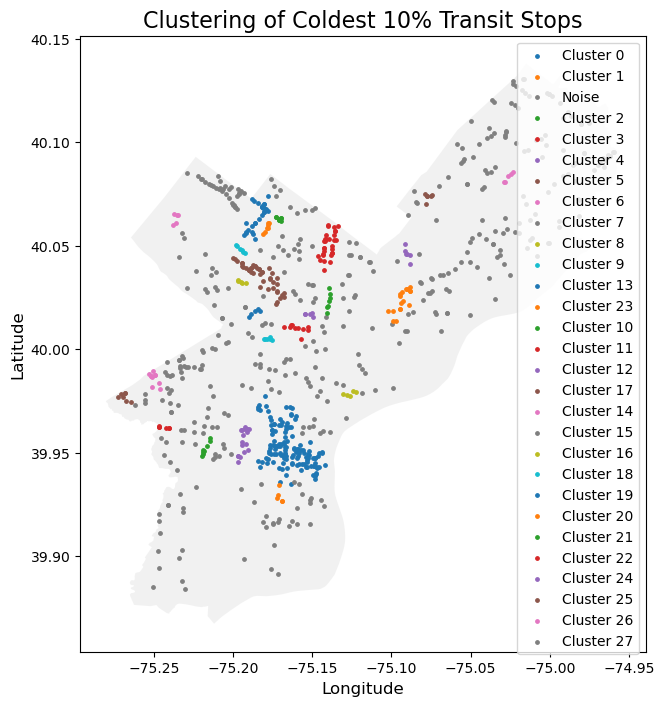

In [9]:
from sklearn.cluster import DBSCAN

# Extract coordinates for the hottest 10% stops
coldest_coordinates = coldest_stops[["x", "y"]].values

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.005, min_samples=5, metric="euclidean")
coldest_stops["cluster"] = dbscan.fit_predict(coldest_coordinates)

# Check if clustering occurred
clusters = coldest_stops["cluster"].unique()
cluster_counts = coldest_stops["cluster"].value_counts()

print("Clusters found:", clusters)
print("Cluster sizes:\n", cluster_counts)

# Plot the clustering result
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot city limits
city_limits_gdf.plot(ax=ax, color="lightgrey", alpha=0.3, label="City Limits")

# Plot clustered points
for cluster_id in clusters:
    cluster_data = coldest_stops[coldest_stops["cluster"] == cluster_id]
    if cluster_id == -1:  # Noise points
        cluster_label = "Noise"
        cluster_color = "grey"
    else:
        cluster_label = f"Cluster {cluster_id}"
        cluster_color = None
    cluster_data.plot(
        ax=ax,
        color=cluster_color,
        markersize=6,
        label=cluster_label,
    )

# Add titles and labels
plt.title("Clustering of Coldest 10% Transit Stops", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend()
plt.show()


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Moran's I: 0.09913440203742446
P-value: 0.001


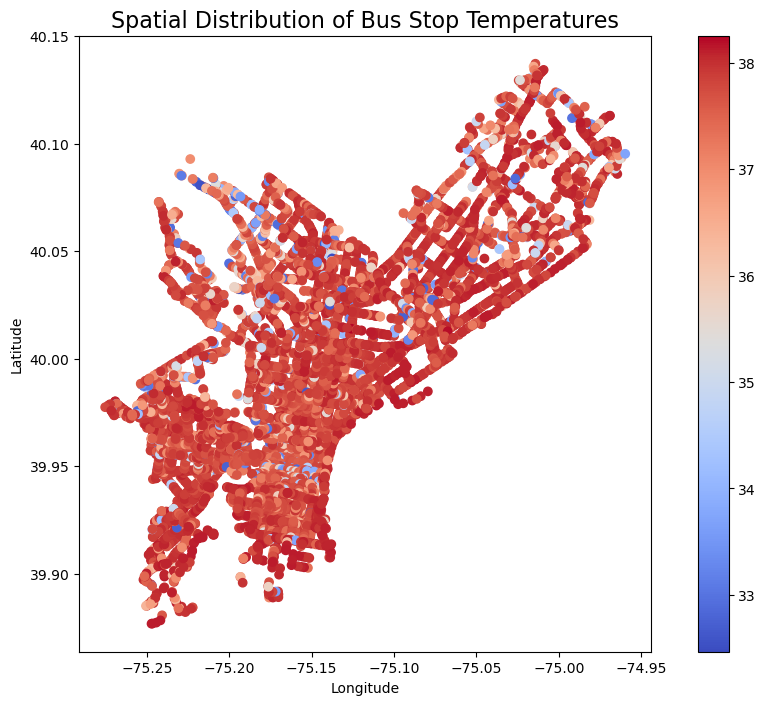

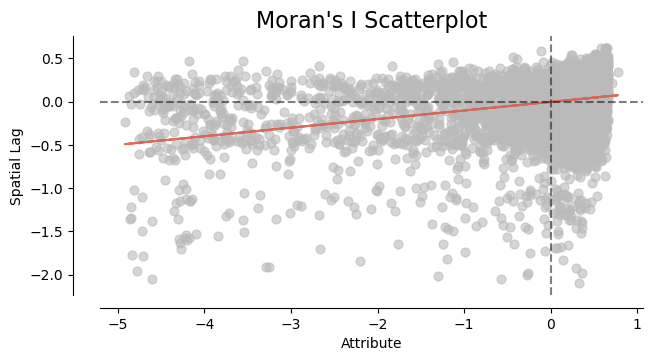

In [10]:
%pip install esda
%pip install libpysal splot


import libpysal as ps
from esda import Moran
from splot.esda import moran_scatterplot
import matplotlib.pyplot as plt

# Ensure CRS is consistent
filtered_gdf = filtered_gdf.to_crs(epsg=4326)

# Create a spatial weights matrix based on distances between stops
coords = filtered_gdf.geometry.apply(lambda geom: (geom.x, geom.y)).tolist()
w = ps.weights.DistanceBand.from_dataframe(filtered_gdf, threshold=0.01, silence_warnings=True)  # 0.01 is approx. 1km

# Standardize the weights (row-normalization)
w.transform = 'r'

# Calculate Moran's I for bus stop temperatures
y = filtered_gdf["13_mean"].values  # Temperature column
moran = Moran(y, w)

# Print Moran's I statistic and p-value
print(f"Moran's I: {moran.I}")
print(f"P-value: {moran.p_sim}")

# Visualize the spatial distribution of temperatures
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
filtered_gdf.plot(column="13_mean", cmap="coolwarm", legend=True, ax=ax)
plt.title("Spatial Distribution of Bus Stop Temperatures", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Plot Moran's I scatterplot
fig, ax = moran_scatterplot(moran)
plt.title("Moran's I Scatterplot", fontsize=16)
plt.show()


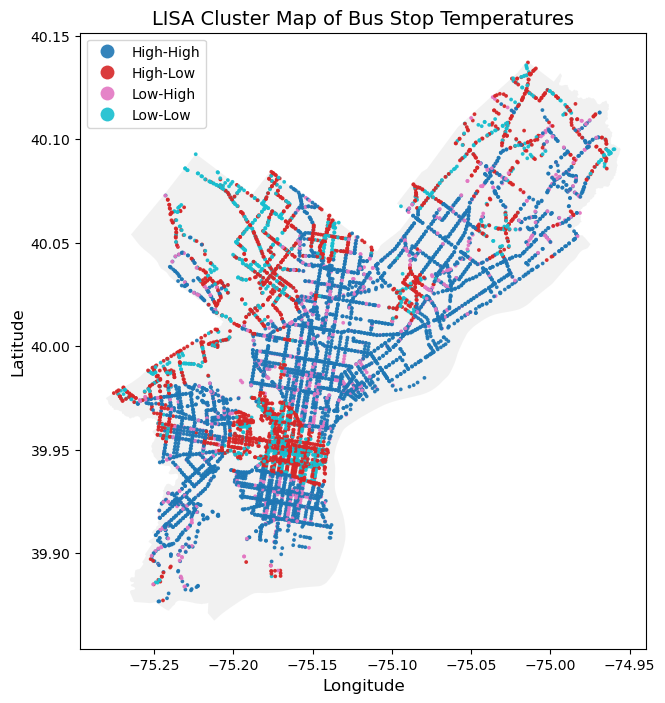

In [11]:
from esda.moran import Moran_Local
from splot.esda import lisa_cluster

# Ensure CRS is consistent
filtered_gdf = filtered_gdf.to_crs(epsg=4326)

# Create a spatial weights matrix
w = ps.weights.DistanceBand.from_dataframe(filtered_gdf, threshold=0.01, silence_warnings=True)  # ~1km
w.transform = 'r'  # Row-standardize the weights

# Extract the temperature column
y = filtered_gdf["13_mean"].values

# Calculate Local Moran's I
local_moran = Moran_Local(y, w)

# Add LISA results to GeoDataFrame
filtered_gdf["Local Moran"] = local_moran.Is
filtered_gdf["LISA Cluster"] = local_moran.q  # Quadrant: 1=HH, 2=LH, 3=LL, 4=HL

# Create a new column for human-readable cluster labels
filtered_gdf["Cluster Type"] = filtered_gdf["LISA Cluster"].map(
    {1: "High-High", 2: "Low-High", 3: "Low-Low", 4: "High-Low"}
)

# Plot city limits and overlay bus stops
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot city limits
city_limits_gdf.plot(ax=ax, color="lightgrey", alpha=0.3, label="City Limits")

# Plot bus stops with LISA cluster types
filtered_gdf.plot(
    column="Cluster Type",
    cmap="tab10",
    legend=True,
    ax=ax,
    markersize=3,  # Adjust dot size here
    alpha=0.9,
    label="Bus Stops"
)

# Add title and labels
plt.title("LISA Cluster Map of Bus Stop Temperatures", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Show the plot
plt.show()



In [12]:
## ACS:
# Path to your GeoJSON file
file_path = "../data/2020_PA_stops_UTCI_ACS_SVI_Building.geojson" 

# Read the GeoJSON file
ACS_Stops = gpd.read_file(file_path)

ACS_Stops.head()


,stop_id,stop_name,route_ids,UTCI_morning,UTCI_evening,UTCI_midday,WFH,MHI,GI,MR,...,UTM_X,UTM_Y,GVI,sky_mean,Enclosure,BD,BH,FAR,BN,geometry
0,69,Front St & Market St Loop,"[17, 33, 48, 5]",34.948630,33.448350,37.581686,0.139661,115521.638538,0.398989,1764.916597,...,2.699503e+06,235350.66167,0.058356,0.310574,0.23491,0.196293,1430.473848,5.310069,63,POINT (2699502.892 235350.662)
1,359,Market St & 6th St,"[17, 33]",34.949771,32.980376,37.577274,0.131727,96124.564583,0.435392,1683.756114,...,2.697272e+06,235665.34239,0.081433,0.252196,0.27737,0.234227,1468.262696,12.516998,36,POINT (2697272.146 235665.342)
2,428,2nd St Station - MFL,[MFL],34.905987,31.097113,37.514491,0.137856,112177.011471,0.408251,1716.078724,...,2.699099e+06,235349.65942,0.072020,0.299649,0.24390,0.244679,1592.339376,6.664597,70,POINT (2699098.735 235349.659)
3,638,5th St & Market St - FS,"[38, 44]",34.115052,30.884770,36.707610,0.139792,101569.077090,0.416658,1701.532301,...,2.697684e+06,235764.19761,0.099296,0.258906,0.27435,0.264319,1435.131718,9.756211,50,POINT (2697683.510 235764.198)
4,735,7th St & Market St,[47],33.439477,30.658051,35.593438,0.127642,87832.216610,0.451920,1651.475390,...,2.696793e+06,235646.11977,0.062803,0.242758,0.28786,0.296215,1855.769137,17.565049,38,POINT (2696792.521 235646.120)


In [13]:
# Display all column names
print(ACS_Stops.columns)


Index(['stop_id', 'stop_name', 'route_ids', 'UTCI_morning', 'UTCI_evening',
       'UTCI_midday', 'WFH', 'MHI', 'GI', 'MR', 'MHV', 'Uninsured_19',
       'Uninsured_19_34', 'Uninsured_35_64', 'Uninsured_65', 'Area_km2', 'UR',
       'PR', 'BR', 'PD', 'CHR', 'White_prop', 'Black_prop',
       'Native_American_prop', 'Asian_prop', 'OtherRaces_prop', 'ED',
       'UTCI_400_sum', 'UTCI_avg', 'MEAN', 'UTM_X', 'UTM_Y', 'GVI', 'sky_mean',
       'Enclosure', 'BD', 'BH', 'FAR', 'BN', 'geometry'],
      dtype='object')


C:\Users\25077\AppData\Local\Temp\ipykernel_18848\2852317162.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ACS_Stops['geometry'] = ACS_Stops.geometry.centroid


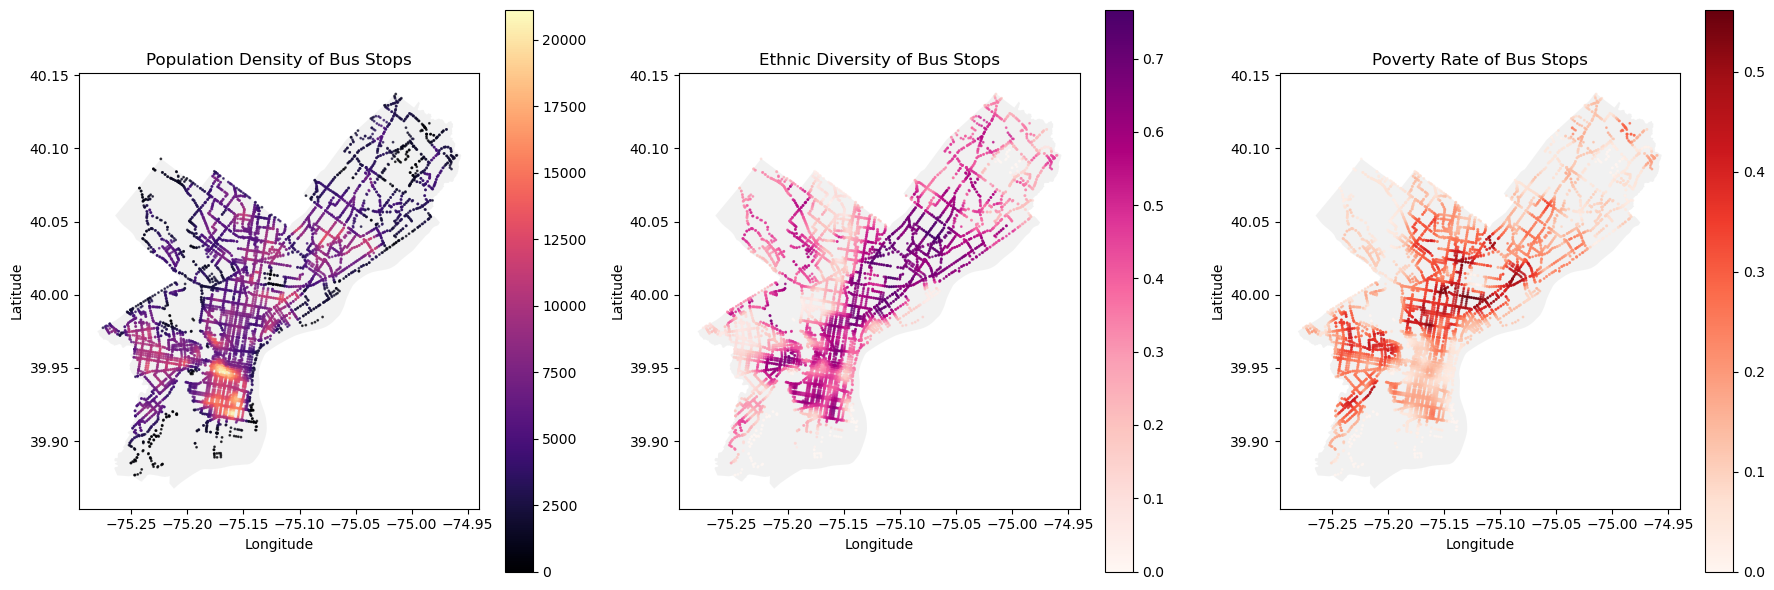

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert MULTIPOLYGON geometries to their centroids
ACS_Stops['geometry'] = ACS_Stops.geometry.centroid

# Reproject to WGS 84 (EPSG:4326)
ACS_Stops = ACS_Stops.to_crs(epsg=4326)

# Assuming `ACS_Stops` contains the bus stops and `city_limits_gdf` contains the city limits

import matplotlib.pyplot as plt

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot City Limits for reference
city_limits_gdf.plot(ax=axes[0], color="lightgrey", alpha=0.3, label="City Limits")
city_limits_gdf.plot(ax=axes[1], color="lightgrey", alpha=0.3, label="City Limits")
city_limits_gdf.plot(ax=axes[2], color="lightgrey", alpha=0.3, label="City Limits")

# Plot Population Density
ACS_Stops.plot(
    column="PD",
    cmap="magma",
    legend=True,
    ax=axes[0],
    markersize=1,
    alpha=0.7,
    label="Population Density"
)
axes[0].set_title("Population Density of Bus Stops")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# Plot Ethnic Diversity
ACS_Stops.plot(
    column="ED",
    cmap="RdPu",
    legend=True,
    ax=axes[1],
    markersize=1,
    alpha=0.7,
    label="Ethnic Diversity"
)
axes[1].set_title("Ethnic Diversity of Bus Stops")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

# Plot Poverty Rate
ACS_Stops.plot(
    column="PR",
    cmap="Reds",
    legend=True,
    ax=axes[2],
    markersize=1,
    alpha=0.7,
    label="Poverty Rate"
)
axes[2].set_title("Poverty Rate of Bus Stops")
axes[2].set_xlabel("Longitude")
axes[2].set_ylabel("Latitude")

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()



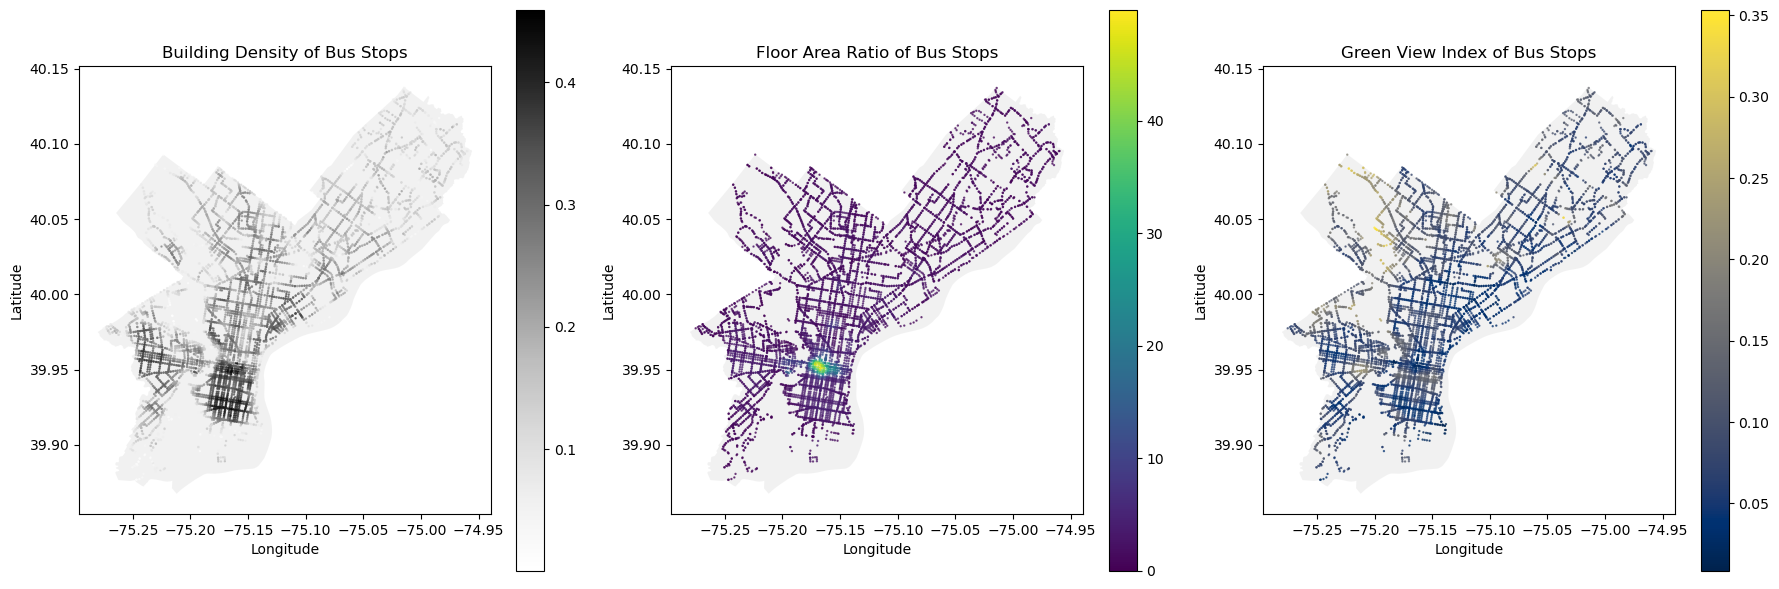

In [20]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot City Limits for reference
city_limits_gdf.plot(ax=axes[0], color="lightgrey", alpha=0.3, label="City Limits")
city_limits_gdf.plot(ax=axes[1], color="lightgrey", alpha=0.3, label="City Limits")
city_limits_gdf.plot(ax=axes[2], color="lightgrey", alpha=0.3, label="City Limits")

# Plot Building Density
ACS_Stops.plot(
    column="BD",
    cmap="Greys",
    legend=True,
    ax=axes[0],
    markersize=0.5,
    alpha=0.7,
    label="Building Density"
)
axes[0].set_title("Building Density of Bus Stops")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# Plot Floor Area Ratio
ACS_Stops.plot(
    column="FAR",
    cmap="viridis",
    legend=True,
    ax=axes[1],
    markersize=0.5,
    alpha=0.7,
    label="Floor Area Ratio"
)
axes[1].set_title("Floor Area Ratio of Bus Stops")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

# Plot Green View Index
ACS_Stops.plot(
    column="GVI",
    cmap="cividis",
    legend=True,
    ax=axes[2],
    markersize=0.5,
    alpha=0.7,
    label="Green View Index"
)
axes[2].set_title("Green View Index of Bus Stops")
axes[2].set_xlabel("Longitude")
axes[2].set_ylabel("Latitude")

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()

In [25]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

fields = ['White_prop','Native_American_prop','Asian_prop',
          'OtherRaces_prop','GI','MR','MHV','PD','PR','CHR',
          'ED','MEAN','GVI','BH','FAR','Enclosure']
data = ACS_Stops[fields].dropna() 


Y = data['MEAN']  
X = data.drop(columns=['MEAN'])  
X = sm.add_constant(X)  


model = sm.OLS(Y, X).fit()


print(model.summary())

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVIF Results:")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                   MEAN   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1355.
Date:                Mon, 23 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:42:39   Log-Likelihood:                -1190.0
No. Observations:                8126   AIC:                             2412.
Df Residuals:                    8110   BIC:                             2524.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   37.6897 

In [26]:
import pickle

# Save the model
with open("ols_model.pkl", "wb") as file:
    pickle.dump(model, file)

# Save the VIF data
vif_data.to_csv("vif_results.csv", index=False)


In [27]:
import pickle
import pandas as pd

# Load the model
with open("ols_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Load the VIF data
loaded_vif_data = pd.read_csv("vif_results.csv")

# Print the loaded results
print(loaded_model.summary())
print("\nLoaded VIF Results:")
print(loaded_vif_data)


                            OLS Regression Results                            
Dep. Variable:                   MEAN   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1355.
Date:                Mon, 23 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:47:14   Log-Likelihood:                -1190.0
No. Observations:                8126   AIC:                             2412.
Df Residuals:                    8110   BIC:                             2524.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   37.6897 